### 0. Importer les biblioth√®ques n√©cessaires

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

---
# 1. Data Sourcing

In [2]:
apps = pd.read_csv("data/googleplaystore.csv")
apps

App             Category  \
0         Photo Editor & Candy Camera & Grid & ScrapBook       ART_AND_DESIGN   
1                                    Coloring book moana       ART_AND_DESIGN   
2      U Launcher Lite ‚Äì FREE Live Cool Themes, Hide ...       ART_AND_DESIGN   
3                                  Sketch - Draw & Paint       ART_AND_DESIGN   
4                  Pixel Draw - Number Art Coloring Book       ART_AND_DESIGN   
...                                                  ...                  ...   
10836                                   Sya9a Maroc - FR               FAMILY   
10837                   Fr. Mike Schmitz Audio Teachings               FAMILY   
10838                             Parkinson Exercices FR              MEDICAL   
10839                      The SCP Foundation DB fr nn5n  BOOKS_AND_REFERENCE   
10840      iHoroscope - 2018 Daily Horoscope & Astrology            LIFESTYLE   

       Rating Reviews                Size     Installs  Type Price  \
0         4.1     159                 19M      10,000+  Free     0   
1         3.9     967                 14M     500,000+  Free     0   
2         4.7   87510                8.7M   5,000,000+  Free     0   
3         4.5  215644                 25M  50,000,000+  Free     0   
4         4.3     967                2.8M     100,000+  Free     0   
...       ...     ...                 ...          ...   ...   ...   
10836     4.5      38                 53M       5,000+  Free     0   
10837     5.0       4                3.6M         100+  Free     0   
10838     NaN       3                9.5M       1,000+  Free     0   
10839     4.5     114  Varies with device       1,000+  Free     0   
10840     4.5  398307                 19M  10,000,000+  Free     0   

      Content Rating                     Genres      Last Updated  \
0           Everyone               Art & Design   January 7, 2018   
1           Everyone  Art & Design;Pretend Play  January 15, 2018   
2           Everyone               Art & Design    August 1, 2018   
3               Teen               Art & Design      June 8, 2018   
4           Everyone    Art & Design;Creativity     June 20, 2018   
...              ...                        ...               ...   
10836       Everyone                  Education     July 25, 2017   
10837       Everyone                  Education      July 6, 2018   
10838       Everyone                    Medical  January 20, 2017   
10839     Mature 17+          Books & Reference  January 19, 2015   
10840       Everyone                  Lifestyle     July 25, 2018   

              Current Ver         Android Ver  
0                   1.0.0        4.0.3 and up  
1                   2.0.0        4.0.3 and up  
2                   1.2.4        4.0.3 and up  
3      Varies with device          4.2 and up  
4                     1.1          4.4 and up  
...                   ...                 ...  
10836                1.48          4.1 and up  
10837                 1.0          4.1 and up  
10838                 1.0          2.2 and up  
10839  Varies with device  Varies with device  
10840  Varies with device  Varies with device  

[10841 rows x 13 columns]

### Informations g√©n√©rales

In [3]:
apps.head()

App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite ‚Äì FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

  Reviews  Size     Installs  Type Price Content Rating  \
0     159   19M      10,000+  Free     0       Everyone   
1     967   14M     500,000+  Free     0       Everyone   
2   87510  8.7M   5,000,000+  Free     0       Everyone   
3  215644   25M  50,000,000+  Free     0           Teen   
4     967  2.8M     100,000+  Free     0       Everyone   

                      Genres      Last Updated         Current Ver  \
0               Art & Design   January 7, 2018               1.0.0   
1  Art & Design;Pretend Play  January 15, 2018               2.0.0   
2               Art & Design    August 1, 2018               1.2.4   
3               Art & Design      June 8, 2018  Varies with device   
4    Art & Design;Creativity     June 20, 2018                 1.1   

    Android Ver  
0  4.0.3 and up  
1  4.0.3 and up  
2  4.0.3 and up  
3    4.2 and up  
4    4.4 and up

In [4]:
apps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [5]:
print(apps.ndim)
print(apps.size)
print(apps.shape)

2
140933
(10841, 13)


In [6]:
ratings = apps.iloc[:, 2:4].values
ratings

array([[4.1, '159'],
       [3.9, '967'],
       [4.7, '87510'],
       ...,
       [nan, '3'],
       [4.5, '114'],
       [4.5, '398307']], dtype=object)

In [7]:
ratings.shape

(10841, 2)

---
# 2. Data Cleaning

On supprime les 3 derni√®res colonnes, puisque on n'en aura pas besoin.

In [8]:
apps.drop('Last Updated', axis = 1, inplace = True)
apps.drop('Current Ver', axis = 1, inplace = True)
apps.drop('Android Ver', axis = 1, inplace = True)

In [9]:
apps.head()

App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite ‚Äì FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

  Reviews  Size     Installs  Type Price Content Rating  \
0     159   19M      10,000+  Free     0       Everyone   
1     967   14M     500,000+  Free     0       Everyone   
2   87510  8.7M   5,000,000+  Free     0       Everyone   
3  215644   25M  50,000,000+  Free     0           Teen   
4     967  2.8M     100,000+  Free     0       Everyone   

                      Genres  
0               Art & Design  
1  Art & Design;Pretend Play  
2               Art & Design  
3               Art & Design  
4    Art & Design;Creativity

### Valeurs Uniques du dataset

In [10]:
def unique_col_values(df):
    for column in df:
        print("{} | {} | {}".format(
            df[column].name, len(df[column].unique()), df[column].dtype))

unique_col_values(apps)

App | 9660 | object
Category | 34 | object
Rating | 41 | float64
Reviews | 6002 | object
Size | 462 | object
Installs | 22 | object
Type | 4 | object
Price | 93 | object
Content Rating | 7 | object
Genres | 120 | object


In [11]:
print("Nombre d'applications dans le dataset : " , len(apps))
apps.sample(7)

Nombre d'applications dans le dataset :  10841


App      Category  Rating  \
7986   Resume Builder - Curriculum Vitae & Resume Maker      BUSINESS     4.0   
3540                                            Notepad  PRODUCTIVITY     4.2   
9908                                     EU VAT Checker      BUSINESS     3.1   
7192                                       CE on the go         TOOLS     4.4   
7023  Fiesta by Tango - Find, Meet and Make New Friends        SOCIAL     4.3   
793   Learn languages, grammar & vocabulary with Mem...     EDUCATION     4.7   
8194                                   Run Sausage Run!          GAME     4.4   

      Reviews                Size     Installs  Type Price Content Rating  \
7986       12                8.1M       5,000+  Free     0       Everyone   
3540    80581                2.5M  10,000,000+  Free     0       Everyone   
9908        7                 39k       1,000+  Free     0       Everyone   
7192       79                3.7M      10,000+  Free     0       Everyone   
7023   112223                 34M   1,000,000+  Free     0     Mature 17+   
793   1107884  Varies with device  10,000,000+  Free     0       Everyone   
8194   276105  Varies with device  10,000,000+  Free     0   Everyone 10+   

            Genres  
7986      Business  
3540  Productivity  
9908      Business  
7192         Tools  
7023        Social  
793      Education  
8194        Arcade

In [12]:
apps.duplicated().value_counts()

False    10356
True       485
dtype: int64

In [13]:
apps.drop_duplicates(inplace=True)

In [14]:
apps.dropna(how ='any', inplace = True)

V√©rifier combien de valeurs manquantes :

In [15]:
apps.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
dtype: int64

In [16]:
apps.drop_duplicates(subset='App', inplace=True)

- Forme finale

In [17]:
print(apps.shape)

(8196, 10)


In [18]:
apps.describe()

Rating
count  8196.000000
mean      4.173243
std       0.536625
min       1.000000
25%       4.000000
50%       4.300000
75%       4.500000
max       5.000000

---
# 3. Data Analysis

## Cat√©gories

In [19]:
categories = apps["Category"].unique()
print(categories)

['ART_AND_DESIGN' 'AUTO_AND_VEHICLES' 'BEAUTY' 'BOOKS_AND_REFERENCE'
 'BUSINESS' 'COMICS' 'COMMUNICATION' 'DATING' 'EDUCATION' 'ENTERTAINMENT'
 'EVENTS' 'FINANCE' 'FOOD_AND_DRINK' 'HEALTH_AND_FITNESS' 'HOUSE_AND_HOME'
 'LIBRARIES_AND_DEMO' 'LIFESTYLE' 'GAME' 'FAMILY' 'MEDICAL' 'SOCIAL'
 'SHOPPING' 'PHOTOGRAPHY' 'SPORTS' 'TRAVEL_AND_LOCAL' 'TOOLS'
 'PERSONALIZATION' 'PRODUCTIVITY' 'PARENTING' 'WEATHER' 'VIDEO_PLAYERS'
 'NEWS_AND_MAGAZINES' 'MAPS_AND_NAVIGATION']


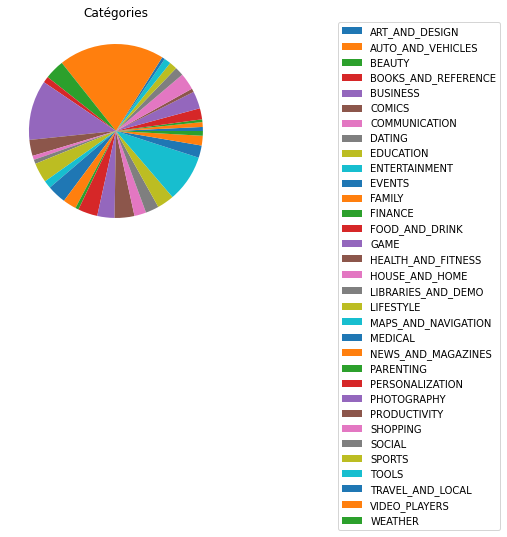

Category   App
0        ART_AND_DESIGN    61
1     AUTO_AND_VEHICLES    73
2                BEAUTY    42
3   BOOKS_AND_REFERENCE   169
4              BUSINESS   263
5                COMICS    54
6         COMMUNICATION   256
7                DATING   134
8             EDUCATION   118
9         ENTERTAINMENT   102
10               EVENTS    45
11               FAMILY  1608
12              FINANCE   302
13       FOOD_AND_DRINK    94
14                 GAME   912
15   HEALTH_AND_FITNESS   244
16       HOUSE_AND_HOME    62
17   LIBRARIES_AND_DEMO    64
18            LIFESTYLE   301
19  MAPS_AND_NAVIGATION   118
20              MEDICAL   290
21   NEWS_AND_MAGAZINES   204
22            PARENTING    50
23      PERSONALIZATION   298
24          PHOTOGRAPHY   263
25         PRODUCTIVITY   301
26             SHOPPING   180
27               SOCIAL   203
28               SPORTS   260
29                TOOLS   718
30     TRAVEL_AND_LOCAL   187
31        VIDEO_PLAYERS   148
32              WEATHER    72

In [20]:
categ = apps.groupby(['Category'], as_index=False)['App'].count()

pourcentage = categ.loc[:, 'App']
labels = categ.loc[:, 'Category']

plt.pie(pourcentage)
plt.legend(labels, bbox_to_anchor=(1.5,1.025), loc="upper left")
plt.title('Cat√©gories')
plt.show()
categ

### R√©duction des Cat√©gories

| Cat√©gories Principales | Sous-Cat√©gories |
| :----: | :---- |
| Lifestyle | BEAUTY,  FOOD_AND_DRINK, HEALTH_AND_FITNESS, LIFESTYLE, HOUSE_AND_HOME, ART_AND_DESIGN, AUTO_AND_VEHICLES, TRAVEL_AND_LOCAL |
| Social Media | DATING,  COMMUNICATION, SOCIAL, FAMILY | 
| Games/Entertainment | COMICS,  GAME, ENTERTAINMENT, SPORTS, EVENTS |
| Productivity/Business | PRODUCTIVITY,  EDUCATION, BUSINESS, FINANCE |
| News/Information Outlets | NEWS_AND_MAGAZINES, WEATHER, LIBRARIES_AND_DEMO, BOOKS_AND_REFERENCE |
| Utility | MAPS_AND_NAVIGATION, SHOPPING, VIDEO_PLAYERS, TOOLS, PHOTOGRAPHY,  PERSONALIZATION |

In [21]:
LIFE = "Lifestyle"
SM = "Social Media"
FUN = "Games/Entertainment"
PROD = "Productivity/Business"
NEWS = "News/Information Outlets"
UTIL = "Utility"

listLIFE = ['BEAUTY',  'FOOD_AND_DRINK',
            'HEALTH_AND_FITNESS', 'LIFESTYLE', 
            'HOUSE_AND_HOME', 'ART_AND_DESIGN', 
            'AUTO_AND_VEHICLES', 'TRAVEL_AND_LOCAL']
listSM = ['DATING',  'COMMUNICATION', 'SOCIAL', 'FAMILY']
listFUN = ['COMICS',  'GAME', 'ENTERTAINMENT', 
           'SPORTS', 'EVENTS']
listPROD = ['PRODUCTIVITY',  'EDUCATION', 'BUSINESS', 'FINANCE']
listNEWS = ['NEWS_AND_MAGAZINES', 'WEATHER', 
            'LIBRARIES_AND_DEMO', 'BOOKS_AND_REFERENCE']
listUTIL = ['MAPS_AND_NAVIGATION', 'SHOPPING', 
            'VIDEO_PLAYERS', 'TOOLS', 'PHOTOGRAPHY',  
            'PERSONALIZATION']

apps.loc[apps['Category'].isin(listSM), 'Main Category'] = SM
apps.loc[apps['Category'].isin(listLIFE), 'Main Category'] = LIFE
apps.loc[apps['Category'].isin(listFUN), 'Main Category'] = FUN
apps.loc[apps['Category'].isin(listPROD), 'Main Category'] = PROD
apps.loc[apps['Category'].isin(listNEWS), 'Main Category'] = NEWS
apps.loc[apps['Category'].isin(listUTIL), 'Main Category'] = UTIL

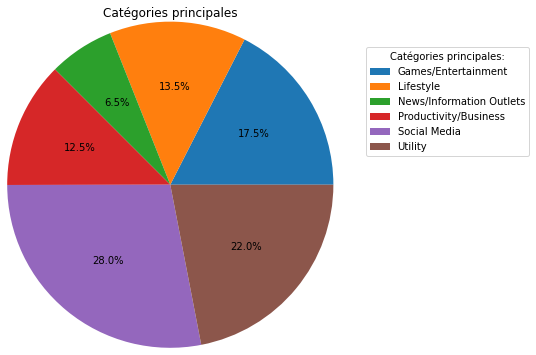

In [22]:
categN = apps.groupby(['Main Category'], as_index=False)['App'].count()

pourcentage = categN.loc[:, 'App']
labels = categN.loc[:, 'Main Category']

plt.pie(pourcentage, autopct='%.1f%%', radius=1.5)
plt.legend(labels, bbox_to_anchor=(1.2, 1.025), loc="upper left", title = "Cat√©gories principales:")
plt.title('Cat√©gories principales', pad=32)
fig = plt.gcf()
fig.set_size_inches(5,5)
plt.show()

In [23]:
mainCategories = apps["Main Category"].unique()
print(mainCategories)

['Lifestyle' 'News/Information Outlets' 'Productivity/Business'
 'Games/Entertainment' 'Social Media' nan 'Utility']


In [24]:
apps.dropna()

App             Category  \
0         Photo Editor & Candy Camera & Grid & ScrapBook       ART_AND_DESIGN   
1                                    Coloring book moana       ART_AND_DESIGN   
2      U Launcher Lite ‚Äì FREE Live Cool Themes, Hide ...       ART_AND_DESIGN   
3                                  Sketch - Draw & Paint       ART_AND_DESIGN   
4                  Pixel Draw - Number Art Coloring Book       ART_AND_DESIGN   
...                                                  ...                  ...   
10834                                      FR Calculator               FAMILY   
10836                                   Sya9a Maroc - FR               FAMILY   
10837                   Fr. Mike Schmitz Audio Teachings               FAMILY   
10839                      The SCP Foundation DB fr nn5n  BOOKS_AND_REFERENCE   
10840      iHoroscope - 2018 Daily Horoscope & Astrology            LIFESTYLE   

       Rating Reviews                Size     Installs  Type Price  \
0         4.1     159                 19M      10,000+  Free     0   
1         3.9     967                 14M     500,000+  Free     0   
2         4.7   87510                8.7M   5,000,000+  Free     0   
3         4.5  215644                 25M  50,000,000+  Free     0   
4         4.3     967                2.8M     100,000+  Free     0   
...       ...     ...                 ...          ...   ...   ...   
10834     4.0       7                2.6M         500+  Free     0   
10836     4.5      38                 53M       5,000+  Free     0   
10837     5.0       4                3.6M         100+  Free     0   
10839     4.5     114  Varies with device       1,000+  Free     0   
10840     4.5  398307                 19M  10,000,000+  Free     0   

      Content Rating                     Genres             Main Category  
0           Everyone               Art & Design                 Lifestyle  
1           Everyone  Art & Design;Pretend Play                 Lifestyle  
2           Everyone               Art & Design                 Lifestyle  
3               Teen               Art & Design                 Lifestyle  
4           Everyone    Art & Design;Creativity                 Lifestyle  
...              ...                        ...                       ...  
10834       Everyone                  Education              Social Media  
10836       Everyone                  Education              Social Media  
10837       Everyone                  Education              Social Media  
10839     Mature 17+          Books & Reference  News/Information Outlets  
10840       Everyone                  Lifestyle                 Lifestyle  

[7856 rows x 11 columns]

---

- Classement des cat√©gories par nombre d'installation

In [25]:
apps['Installs'].value_counts()

1,000,000+        1415
100,000+          1094
10,000+            987
10,000,000+        937
1,000+             697
5,000,000+         607
500,000+           504
50,000+            457
5,000+             425
100+               303
50,000,000+        202
500+               199
100,000,000+       188
10+                 69
50+                 56
500,000,000+        24
1,000,000,000+      20
5+                   9
1+                   3
Name: Installs, dtype: int64

In [26]:
apps.drop(apps[apps['Installs'] == "Free"].index, inplace = True)

apps['numInstalls'] = apps.Installs.apply(lambda x : float(x.strip('+').replace(',', '')))

In [27]:
res = apps.groupby('App')['numInstalls'].sum().reset_index()
byInstalls = res.sort_values(by = 'numInstalls', ascending = False).head(10)
byInstalls

App   numInstalls
4010        Google Play Movies & TV  1.000000e+09
3982                         Google  1.000000e+09
5000      Maps - Navigate & Explore  1.000000e+09
3991   Google Chrome: Fast & Secure  1.000000e+09
3432                       Facebook  1.000000e+09
6807                 Subway Surfers  1.000000e+09
4008              Google Play Books  1.000000e+09
4009              Google Play Games  1.000000e+09
3994                   Google Drive  1.000000e+09
6592  Skype - free IM & video calls  1.000000e+09

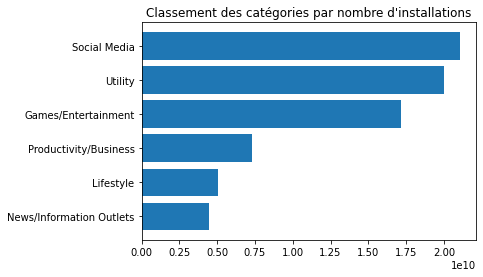

In [28]:
# La somme des installations
sumInstalls = apps.groupby(['Main Category'],as_index=False)['numInstalls'].sum().sort_values('numInstalls')


# Bar chart
plt.barh(sumInstalls['Main Category'], sumInstalls['numInstalls'])
plt.title("Classement des cat√©gories par nombre d'installations")
plt.show()

### - Rating
- Moyenne des notes des applications

In [29]:
print('Note moyenne des applications = ', np.mean(apps['Rating']))

Note moyenne des applications =  4.173243045387993


- Classement des cat√©gories par total des notes

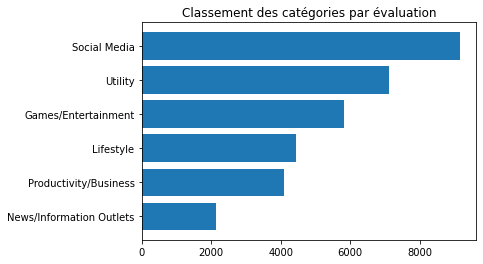

In [30]:
# La somme des √©valuations
sumRating = apps.groupby(['Main Category'],as_index=False)['Rating'].sum().sort_values('Rating')


# Bar chart
plt.barh(sumRating['Main Category'], sumRating['Rating'])
plt.title("Classement des cat√©gories par √©valuation")
plt.show()

### - Meilleur Application dans chaque cat√©gorie

In [31]:
apps.Reviews = pd.to_numeric(apps.Reviews)

In [32]:
result = apps.loc[apps.groupby(['Main Category']).Rating.agg('idxmax').reset_index(drop=True)]

In [33]:
result[['App', 'Main Category', 'Rating', 'Reviews']]

App  \
329                       Hojiboy Tojiboyev Life Hacks   
5064  Tafsiir Quraan MP3 Af Soomaali Quraanka Kariimka   
1547                                      Eternal life   
5125                             Ag Valley Cooperative   
612                      American Girls Mobile Numbers   
3957                                      ADS-B Driver   

                 Main Category  Rating  Reviews  
329        Games/Entertainment     5.0       15  
5064                 Lifestyle     5.0        7  
1547  News/Information Outlets     5.0       26  
5125     Productivity/Business     5.0        6  
612               Social Media     5.0        5  
3957                   Utility     5.0        2

Rating/Reviews

In [34]:
apps.Reviews = pd.to_numeric(apps.Reviews)

In [35]:
apps_new = apps
apps_new["Rating/Reviews"] = apps.Rating/apps.Reviews

In [36]:
ratio = apps_new.loc[apps.groupby(['Main Category'])['Rating/Reviews'].agg('idxmin').reset_index(drop=True)]

In [37]:
ratio[['App', 'Main Category', 'Rating', 'Reviews']]

App             Main Category  \
1670                           Clash of Clans       Games/Entertainment   
3117                Maps - Navigate & Explore                 Lifestyle   
3739                                  Twitter  News/Information Outlets   
699            Duolingo: Learn Languages Free     Productivity/Business   
2544                                 Facebook              Social Media   
4005  Clean Master- Space Cleaner & Antivirus                   Utility   

      Rating   Reviews  
1670     4.6  44891723  
3117     4.3   9235155  
3739     4.3  11667403  
699      4.7   6289924  
2544     4.1  78158306  
4005     4.7  42916526

---

### - Applications gratuites / payantes

In [38]:
apps.dropna(how ='any', inplace = True)

In [39]:
types = apps["Type"].unique()
types

array(['Free', 'Paid'], dtype=object)

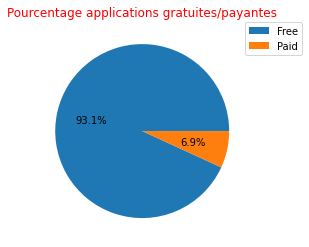

In [40]:
typeApp = apps.groupby(['Type'], as_index=False)["App"].count()

pourcentageType = typeApp.loc[:, 'App']
labels = typeApp.loc[:, 'Type']

plt.pie(pourcentageType, autopct='%.1f%%')
plt.legend(labels, bbox_to_anchor=(0.95,1.025), loc="upper left")
plt.title('Pourcentage applications gratuites/payantes',color='r')
plt.show()

### - Analyse des applications payantes

In [41]:
apps.Price.unique()

array(['0', '$4.99', '$3.99', '$6.99', '$7.99', '$5.99', '$2.99', '$3.49',
       '$1.99', '$9.99', '$7.49', '$0.99', '$3.95', '$29.99', '$2.49',
       '$4.49', '$1.70', '$8.99', '$1.49', '$3.88', '$14.99', '$399.99',
       '$17.99', '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61',
       '$2.50', '$1.59', '$6.49', '$1.29', '$19.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$8.49', '$1.75', '$11.99',
       '$14.00', '$2.00', '$3.08', '$2.59', '$19.40', '$3.90', '$10.00',
       '$3.04', '$12.99', '$13.99', '$4.29', '$3.28', '$4.60', '$1.00',
       '$10.99', '$2.95', '$2.90', '$1.97', '$2.56', '$16.99', '$1.20'],
      dtype=object)

In [42]:
apps['rawPrice'] = apps.Price.apply(lambda x: float(x.replace('$','')))

In [43]:
apps['rawPrice'].describe()

count    7856.000000
mean        1.002170
std        17.163982
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       400.000000
Name: rawPrice, dtype: float64

In [44]:
apps[apps['rawPrice'] == 400]

App   Category  Rating  Reviews  Size Installs  \
4367  I'm Rich - Trump Edition  LIFESTYLE     3.6      275  7.3M  10,000+   

      Type    Price Content Rating     Genres Main Category  numInstalls  \
4367  Paid  $400.00       Everyone  Lifestyle     Lifestyle      10000.0   

      Rating/Reviews  rawPrice  
4367        0.013091     400.0

In [45]:
apps[['Main Category', 'App', 'Price', 'Installs', 'Rating']][apps["rawPrice"] > 250]

Main Category                             App    Price  \
4197           Social Media          most expensive app (H)  $399.99   
4362              Lifestyle                      üíé I'm rich  $399.99   
4367              Lifestyle        I'm Rich - Trump Edition  $400.00   
5351              Lifestyle                       I am rich  $399.99   
5354           Social Media                  I am Rich Plus  $399.99   
5355              Lifestyle                   I am rich VIP  $299.99   
5356  Productivity/Business               I Am Rich Premium  $399.99   
5357              Lifestyle             I am extremely Rich  $379.99   
5358  Productivity/Business                      I am Rich!  $399.99   
5359  Productivity/Business              I am rich(premium)  $399.99   
5362           Social Media                   I Am Rich Pro  $399.99   
5364  Productivity/Business  I am rich (Most expensive app)  $399.99   
5366           Social Media                       I Am Rich  $389.99   
5369  Productivity/Business                       I am Rich  $399.99   
5373  Productivity/Business              I AM RICH PRO PLUS  $399.99   

      Installs  Rating  
4197      100+     4.3  
4362   10,000+     3.8  
4367   10,000+     3.6  
5351  100,000+     3.8  
5354   10,000+     4.0  
5355   10,000+     3.8  
5356   50,000+     4.1  
5357    1,000+     2.9  
5358    1,000+     3.8  
5359    5,000+     3.5  
5362    5,000+     4.4  
5364    1,000+     4.1  
5366   10,000+     3.6  
5369    5,000+     4.3  
5373    1,000+     4.0

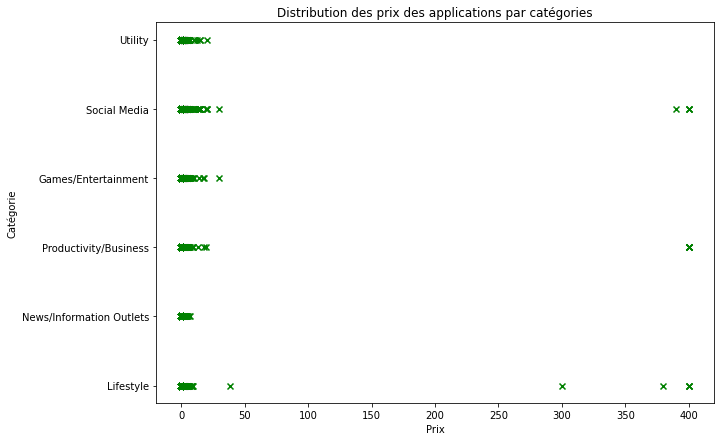

In [46]:
plotPrice = plt.figure(figsize=(10,7))
plt.scatter(apps["rawPrice"], apps["Main Category"], marker='x', color = 'green')
plt.xlabel('Prix') 
plt.ylabel('Cat√©gorie') 
plt.title('Distribution des prix des applications par cat√©gories')
plt.show()

#### Games 

In [47]:
games = apps[apps['Category'] == 'GAME'][['App', 'Rating', 'Size', 'Installs', 'Price', 'rawPrice',  'numInstalls']]
paidGames = games[games['rawPrice'] != 0]

In [48]:
paidGames.sample(10)

App  Rating  Size    Installs  Price  \
7417    Grand Theft Auto: San Andreas     4.4   26M  1,000,000+  $6.99   
6181   Shadow Fight 2 Special Edition     4.5   86M     50,000+  $4.99   
10270                    Galaxian(FC)     4.5  7.8M        100+  $1.99   
3977                 B-Grade Renegade     3.9   64M      1,000+  $1.99   
4612     Don't Starve: Pocket Edition     4.4  7.9M    100,000+  $4.99   
4708                Mental Hospital V     4.2   25M     50,000+  $0.99   
1831                 The Game of Life     4.4   63M    100,000+  $2.99   
4620           Ludo - Don't get angry     4.2   23M      1,000+  $1.61   
9056      Santa's Monster Shootout DX     5.0   33M         50+  $1.99   
10682             Fruit Ninja Classic     4.3   36M  1,000,000+  $0.99   

       rawPrice  numInstalls  
7417       6.99    1000000.0  
6181       4.99      50000.0  
10270      1.99        100.0  
3977       1.99       1000.0  
4612       4.99     100000.0  
4708       0.99      50000.0  
1831       2.99     100000.0  
4620       1.61       1000.0  
9056       1.99         50.0  
10682      0.99    1000000.0

In [49]:
paidGames.describe()

Rating   rawPrice   numInstalls
count  76.000000  76.000000  7.600000e+01
mean    4.372368   3.649605  2.763061e+05
std     0.359110   3.299108  1.170023e+06
min     3.300000   0.990000  1.000000e+00
25%     4.200000   0.990000  1.000000e+03
50%     4.450000   2.990000  1.000000e+04
75%     4.600000   4.990000  1.000000e+05
max     5.000000  17.990000  1.000000e+07

In [50]:
print('Prix moyen des jeux = $', end='')
print(np.round(np.mean(paidGames['rawPrice']), 2))

Prix moyen des jeux = $3.65


---
## Conclusions finales

- La majorit√© des applications sont gratuites.
- On peut deployer des application payantes, notamment des jeux avec un prix d'environ $3.65 .
- Le march√© est satur√© par les applications de la cat√©gorie Social Media suivie de la cat√©gorie Outils, mais se sont aussi les cat√©gories les plus t√©l√©charg√©es et les mieux not√©es.